# Using SVD to look at progressive image reconstruction
## This notebook illsturates how to reconstruct an image using SVD with different number of singular vectors

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

import os
from PIL import Image
import seaborn as sns
import pandas as pd
%matplotlib inline

In [3]:
img_file = "SanFransciscoBayAreaWeb.png"
img = Image.open(img_file)
# view the image from Python
# img.show()
print(img.size)
# Red =0, Green = 1, Blue = 2
green_band = img.getdata(band=1)

# convert to numpy array 
img_arr_green = np.array(list(green_band), float) 
print(img_arr_green.size)
# print(img_mat_green)



(2369, 2347)
5560043


In [4]:
# get image shape
img_arr_green.shape = (img.size[1], img.size[0])
# conver to 1d-array to matrix
img_mat = np.matrix(img_arr_green)
# img_mat = np.matrix(img_mat_blue)
img_mat

matrix([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0., 23., ..., 55.,  0.,  0.],
        ...,
        [ 0.,  0., 11., ..., 34.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

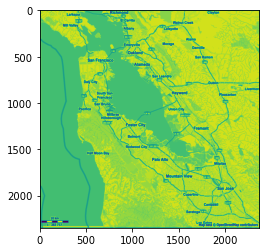

In [5]:
plt.imshow(img_mat)

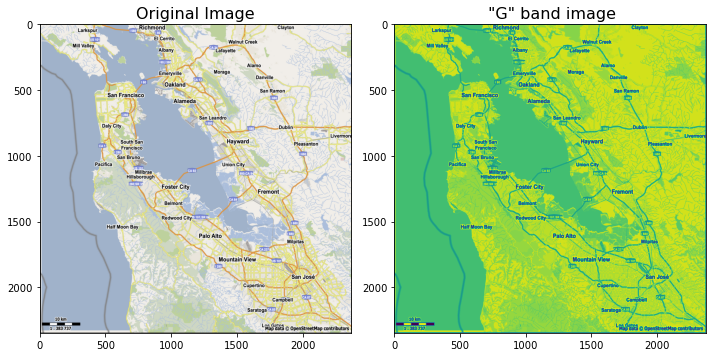

In [6]:
fig, axs = plt.subplots(1, 2,figsize=(10,10))
axs[0].imshow(img)
axs[0].set_title('Original Image', size=16)
axs[1].imshow(img_mat)
axs[1].set_title(' "G" band image', size=16)
plt.tight_layout()
plt.savefig('Original_image_and_G_band_image_for_SVD.jpg',dpi=150)

In [7]:
# Let us center and scale the data before applying SVD. This will help us put each variable in the same scale.
 
# scale the image matrix befor SVD
img_mat_scaled= (img_mat-img_mat.mean())/img_mat.std()

In [8]:
# Perform SVD using np.linalg.svd
U, s, V = np.linalg.svd(img_mat_scaled) 
print(U.shape)
print(V.shape)
print(s)
print(s.shape)

(2347, 2347)
(2369, 2369)
[9.91492787e+02 6.80602446e+02 5.84811039e+02 ... 8.99651283e-13
 1.21819373e-13 6.59250535e-14]
(2347,)


In [9]:
#  Compute Variance explained by each singular vector
var_explained = np.round(s**2/np.sum(s**2), decimals=3)*100
# Variance explained top Singular vectors
var_explained[0:20]
cum_var_explained = np.cumsum(var_explained)
cum_var_explained 
num_sing_vals = 80
df_var = pd.DataFrame({'SingularVector': list(range(1,num_sing_vals+1)), 'VarianceExplained': var_explained[0:num_sing_vals]})
df_cum = pd.DataFrame({'SingularVector': list(range(1,num_sing_vals+1)), 'CumulativeVarianceExplained': cum_var_explained[0:num_sing_vals]})
print(df_var.head())
print(df_cum.head())

   SingularVector  VarianceExplained
0               1               17.7
1               2                8.3
2               3                6.2
3               4                3.7
4               5                3.3
   SingularVector  CumulativeVarianceExplained
0               1                         17.7
1               2                         26.0
2               3                         32.2
3               4                         35.9
4               5                         39.2


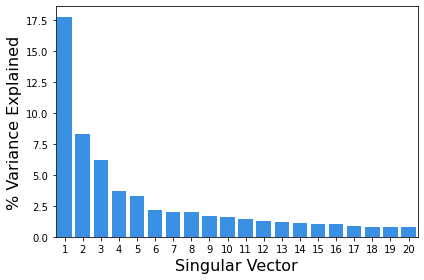

In [10]:
sns.barplot(x=list(range(1,21)),
            y=var_explained[0:20], color="dodgerblue")
plt.xlabel('Singular Vector', fontsize=16)
plt.ylabel('% Variance Explained', fontsize=16)
plt.tight_layout()
plt.savefig('svd_scree_plot.png',dpi=150, figsize=(8,6))

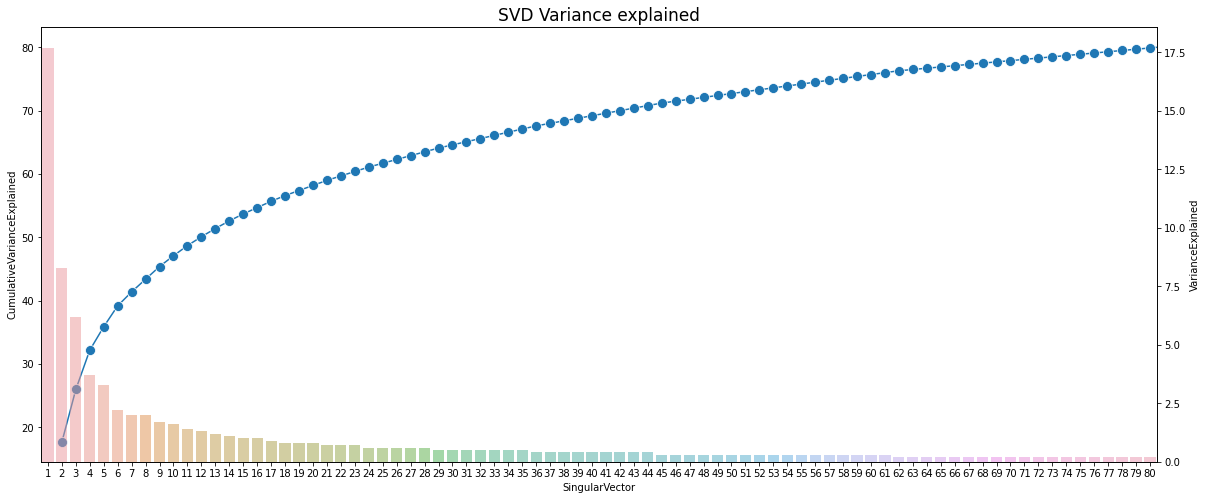

In [11]:
fig, ax = plt.subplots(figsize=(20,8))
g = sns.lineplot(x='SingularVector',  y='CumulativeVarianceExplained', data= df_cum, ax=ax, marker='o', markersize=10)
ax2 = ax.twinx()
g = sns.barplot(x='SingularVector',  y='VarianceExplained', data=df_var, ax=ax2, alpha=.5)
ax.set_title('SVD Variance explained', fontsize = 17)
plt.show()

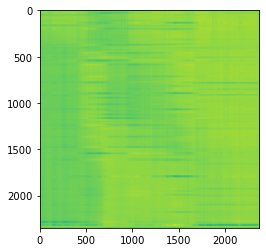

In [12]:
num_components = 5
reconst_img_5 = np.matrix(U[:, :num_components]) @ np.diag(s[:num_components]) @ np.matrix(V[:num_components, :])
plt.imshow(reconst_img_5)
plt.savefig('reconstructed_image_with_5_SVs.png',dpi=150, figsize=(8,6))

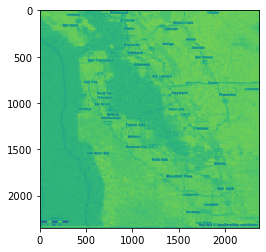

In [13]:
num_components = 50
reconst_img_50 = np.matrix(U[:, :num_components]) @ np.diag(s[:num_components]) @ np.matrix(V[:num_components, :])
plt.imshow(reconst_img_50)
plt.savefig('reconstructed_image_with_50_SVs.png',dpi=150, figsize=(8,6))

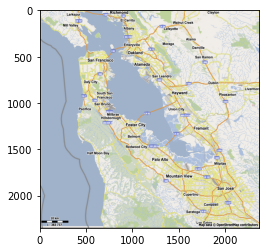

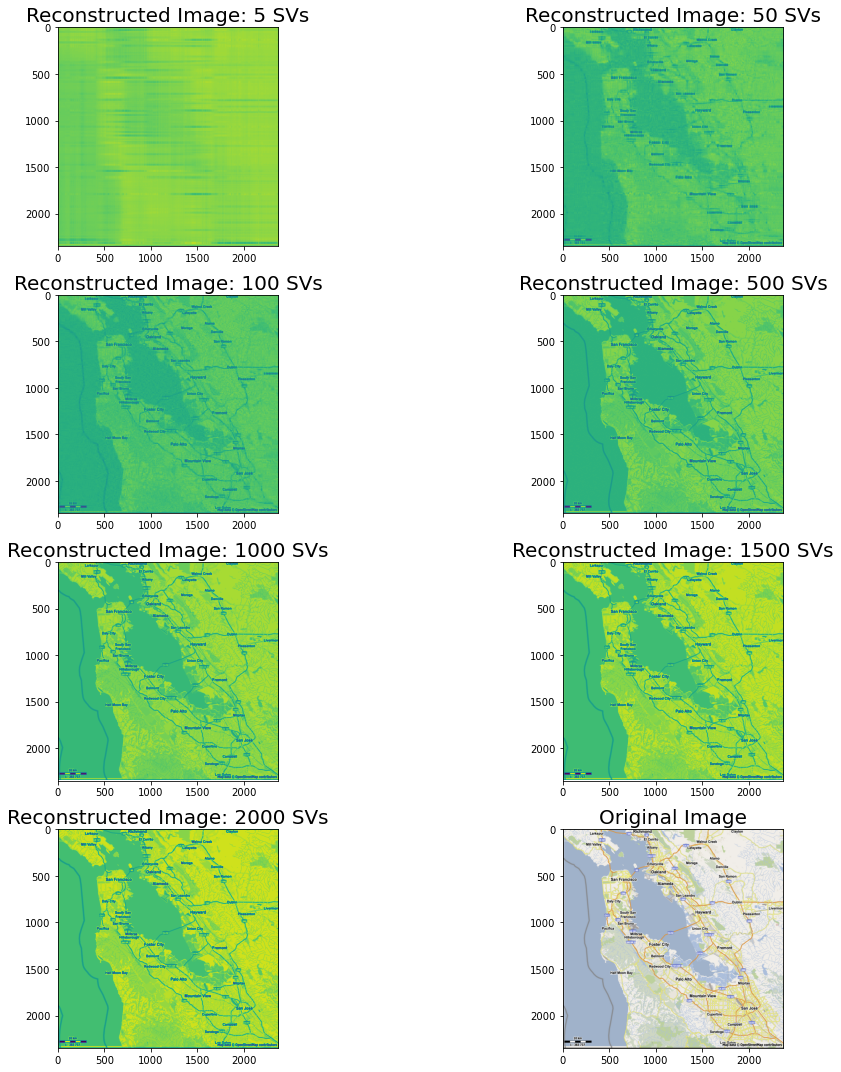

In [14]:
num_components = 100
reconst_img_100 = np.matrix(U[:, :num_components]) @ np.diag(s[:num_components]) @ np.matrix(V[:num_components, :])
plt.imshow(reconst_img_100)
plt.savefig('reconstructed_image_with_100_SVs.png',dpi=150, figsize=(8,6))


num_components = 500
reconst_img_500 = np.matrix(U[:, :num_components]) @ np.diag(s[:num_components]) @ np.matrix(V[:num_components, :])
plt.imshow(reconst_img_500)
plt.savefig('reconstructed_image_with_500_SVs.png',dpi=150, figsize=(8,6))

num_components = 1000
reconst_img_1000 = np.matrix(U[:, :num_components]) @ np.diag(s[:num_components]) @ np.matrix(V[:num_components, :])
plt.imshow(reconst_img_1000)
plt.savefig('reconstructed_image_with_1000_SVs.png',dpi=150, figsize=(8,6))

num_components = 1500
reconst_img_1500 = np.matrix(U[:, :num_components]) @ np.diag(s[:num_components]) @ np.matrix(V[:num_components, :])
plt.imshow(reconst_img_1500)
plt.savefig('reconstructed_image_with_1500_SVs.png',dpi=150, figsize=(8,6))

num_components = 2000
reconst_img_2000 = np.matrix(U[:, :num_components]) @ np.diag(s[:num_components]) @ np.matrix(V[:num_components, :])
plt.imshow(reconst_img_2000)
plt.savefig('reconstructed_image_with_2000_SVs.png',dpi=150, figsize=(8,6))

plt.imshow(img)

fig, axs = plt.subplots(4, 2,figsize=(15,15))
axs[0, 0].imshow(reconst_img_5)
axs[0, 0].set_title('Reconstructed Image: 5 SVs', size=20)
axs[0, 1].imshow(reconst_img_50)
axs[0, 1].set_title('Reconstructed Image: 50 SVs', size=20)
axs[1, 0].imshow(reconst_img_100)
axs[1, 0].set_title('Reconstructed Image: 100 SVs', size=20)
axs[1, 1].imshow(reconst_img_500)
axs[1, 1].set_title('Reconstructed Image: 500 SVs', size=20)
axs[2, 0].imshow(reconst_img_1000)
axs[2, 0].set_title('Reconstructed Image: 1000 SVs', size=20)
axs[2, 1].imshow(reconst_img_1500)
axs[2, 1].set_title('Reconstructed Image: 1500 SVs', size=20)
axs[3, 0].imshow(reconst_img_2000)
axs[3, 0].set_title('Reconstructed Image: 2000 SVs', size=20)
axs[3, 1].imshow(img)
axs[3, 1].set_title('Original Image', size=20)
plt.tight_layout()
plt.savefig('reconstructed_images_using_different_SVs.jpg',dpi=150)

In [14]:
# Trying 3 channels

DECOMPOSITION_OUTPUT_DIR = '../svd/decomposition/'


def display_img(data):
    i = toimage(data[1])
    i.show()


def get_zoomed_image(image_as_list ,zoom_ratio):
    resized_list = imresize(image_as_list, zoom_ratio)
    resized_img = toimage(resized_list)
    return resized_img


def save_single_img(folder_name, file_name, img):
    file_path = DECOMPOSITION_OUTPUT_DIR + folder_name + '//'
    if not os.path.exists(os.path.dirname(file_path)):
        os.makedirs(os.path.dirname(file_path))
    img.save(file_path + '/' + file_name + '.png')


def get_image_channels(image_as_list):
    red_channel = image_as_list[:,:,0]
    green_channel = image_as_list[:,:,1]
    blue_channel = image_as_list[:,:,2]
    return (red_channel, green_channel, blue_channel)


def append_channels(red_channel, green_channel, blue_channel):
    image = []
    image.append(red_channel)
    image.append(green_channel)
    image.append(blue_channel)
    rgb_image = np.array(image)
    return rgb_image

def decompose(image_matrix):
    """
    # Get decomposed matrices, USVtranspose
    """
    U, S, V = np.linalg.svd(image_matrix, full_matrices=True)
    reshaped_u = reshape_matrix(U)
    return reshaped_u, S, V


def reshape_matrix(matrix):
    """
    # Transpose of sorts, was needed because of the way arrays are stored
    # Different than MATLAB
    """
    reshaped_matrix = []
    for i in range(0, len(matrix[0])):
        vector = matrix[:,i]
        reshaped_matrix.append(vector)
    reshaped_matrix = np.array(reshaped_matrix)
    return reshaped_matrix


def vector_vector_transpose_multiplication(vector1, vector2):
    """
    # Generates matrix
    """
    result_matrix = []
    for item in vector1:
        single_vector = item * vector2
        single_vector = np.array(single_vector)
        result_matrix.append(single_vector)
    result_matrix = np.array(result_matrix)
    return result_matrix


def decomposed_matrix_multiplication(vector1, scalar, vector2):
    """
    # Generates a single matrix from vector vector transpose and scalar multiplication
    """
    matrix = vector_vector_transpose_multiplication(vector1, vector2)
    matrix = scalar * matrix
    return matrix


def generate_decomposed_matrices(U,S,V):
    """
    # Generates all sub decomposition matrices from a SVD
    """
    decomposed_matrices = []
    for i in range(0,len(S)):
        single_matrix = decomposed_matrix_multiplication(U[i], S[i], V[i])
        decomposed_matrices.append(single_matrix)
    return decomposed_matrices

def save_sample_rgb_decomposition(folder_name, red_decomposed_list, green_decomposed_list,
                                  blue_decomposed_list, first_n_decompositions):
    """
    # Saves a sample for rgb images
    """
    image_height = red_decomposed_list[0].shape[0]
    image_width = red_decomposed_list[0].shape[1]
    summed_image = np.zeros((3, image_height, image_width))
    for index,item in enumerate(red_decomposed_list[:first_n_decompositions:]):  # First n decompositions
        reconstructed_image = append_channels(red_decomposed_list[index], green_decomposed_list[index], blue_decomposed_list[index])
        image = get_zoomed_image(reconstructed_image, 100)  # No zoom
        save_single_img(folder_name, str(index), image)
        summed_image = summed_image + reconstructed_image
    summed_image = get_zoomed_image(summed_image, 100)  # No zoom
    save_single_img(folder_name, 'summed_image', summed_image)

In [15]:

rgb_image = scipy.misc.imread(IMAGE_DATA)
img_red_channel, img_green_channel, img_blue_channel = get_image_channels(rgb_img_as_matrix)
# An example decomposition - RGB img - decompose on separated channels
U_red, S_red, V_red = decompose(img_red_channel)  # Get red decomposition
U_green, S_green, V_green = decompose(img_green_channel)  # Get green decomposition
U_blue, S_blue, V_blue = decompose(img_blue_channel)  # Get blue decomposition
# Generate decomposed matrices
red_decomposed_list = generate_decomposed_matrices(U_red, S_red, V_red)
green_decomposed_list = generate_decomposed_matrices(U_green, S_green, V_green)
blue_decomposed_list = generate_decomposed_matrices(U_blue, S_blue, V_blue)
# Save sample results
save_sample_rgb_decomposition('rgb_img', red_decomposed_list, green_decomposed_list, blue_decomposed_list, 30)

AttributeError: module 'scipy.misc' has no attribute 'imread'

In [ ]:
from PIL import Image
im = Image.open(img_file).convert('RGB')

# Split into 3 channels
r, g, b = im.split()

# Increase Reds
r = r.point(lambda i: i * 1.2)

# Decrease Greens
g = g.point(lambda i: i * 0.9)

# Recombine back to RGB image
result = Image.merge('RGB', (r, g, b))
result.show()
# result.save('result.png')

In [ ]:
from PIL import Image 

img_file = "SanFransciscoBayAreaWeb.png"
# Open image 
img = Image.open(img_file) 



# print(img.size)
# Red =0, Green = 1, Blue = 2
red_band = img.getdata(band=0)
green_band = img.getdata(band=1)
blue_band = img.getdata(band=2)

# convert to numpy array 
img_arr_red = np.array(list(red_band), float) 
img_arr_green = np.array(list(green_band), float) 
img_arr_blue = np.array(list(blue_band), float) 

# print(img_arr_red.size)
# print(img_arr_green.size)
# print(img_arr_blue.size)
# print(img_mat_green)

# get image shape
img_arr_red.shape = (img.size[1], img.size[0])
img_arr_green.shape = (img.size[1], img.size[0])
img_arr_blue.shape = (img.size[1], img.size[0])

# conver to 1d-array to matrix
img_red_channel = np.matrix(img_arr_red)
img_green_channel = np.matrix(img_arr_green)
img_blue_channel = np.matrix(img_arr_blue)

print(img_red_channel)
print(img_green_channel)
print(img_blue_channel)

# fig, axs = plt.subplots(2, 2,figsize=(15,15))
# axs[0, 0].imshow(img)
# axs[0, 0].set_title('Original Image', size=16)
# axs[0, 1].imshow(img_red_channel)
# axs[0, 1].set_title(' "R" band image', size=16)
# axs[1, 0].imshow(img_green_channel)
# axs[1, 0].set_title(' "G" band image', size=16)
# axs[1, 1].imshow(img_blue_channel)
# axs[1, 1].set_title(' "B" band image', size=16)
# plt.tight_layout()
# plt.savefig('Original_image_and_G_band_image_for_SVD.jpg',dpi=150)





# Scale all 3 matrices before SVD
img_red_channel_scaled = (img_red_channel-img_red_channel.mean())/img_red_channel.std()
img_green_channel_scaled = (img_green_channel-img_green_channel.mean())/img_green_channel.std()
img_blue_channel_scaled = (img_blue_channel-img_blue_channel.mean())/img_blue_channel.std()


# img_red_channel, img_green_channel, img_blue_channel = get_image_channels(rgb_img_as_matrix)
# An example decomposition - RGB img - decompose on separated channels
U_red, S_red, V_red = np.linalg.svd(img_red_channel_scaled)  # Get red decomposition
U_green, S_green, V_green = np.linalg.svd(img_green_channel_scaled)  # Get green decomposition
U_blue, S_blue, V_blue = np.linalg.svd(img_blue_channel_scaled)  # Get blue decomposition

# # Generate decomposed matrices
# red_decomposed_list = generate_decomposed_matrices(U_red, S_red, V_red)
# green_decomposed_list = generate_decomposed_matrices(U_green, S_green, V_green)
# blue_decomposed_list = generate_decomposed_matrices(U_blue, S_blue, V_blue)
# # Save sample results
# save_sample_rgb_decomposition('rgb_img', red_decomposed_list, green_decomposed_list, blue_decomposed_list, 30)


first_n_decomp = [1, 2, 5, 10, 20, 25, 50, 75, 100, 200, 500, 750, 1000, 1250, 1500, 1750, 2000]
num_components = 2000
reconst_mat_red = np.matrix(U_red[:, :num_components]) @ np.diag(S_red[:num_components]) @ np.matrix(V_red[:num_components, :])
reconst_mat_green = np.matrix(U_green[:, :num_components]) @ np.diag(S_green[:num_components]) @ np.matrix(V_green[:num_components, :])
reconst_mat_blue = np.matrix(U_blue[:, :num_components]) @ np.diag(S_blue[:num_components]) @ np.matrix(V_blue[:num_components, :])

print(reconst_mat_red.shape)
print(reconst_mat_green.shape)
print(reconst_mat_blue.shape)


# reconst_image_new = np.concatenate(reconst_img_red, reconst_img_green, reconst_img_blue, )
# reconst_image_new.show()
# reconst_image = 
# plt.imshow(reconst_mat_green)
# plt.savefig('reconstructed_image_with_100_SVs.png',dpi=150, figsize=(8,6))


fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original Image', size=16)
axs[0, 1].imshow(reconst_mat_red)
axs[0, 1].set_title(' "R" band image', size=16)
axs[1, 0].imshow(reconst_mat_green)
axs[1, 0].set_title(' "G" band image', size=16)
axs[1, 1].imshow(reconst_mat_blue)
axs[1, 1].set_title(' "B" band image', size=16)
plt.tight_layout()
# plt.savefig('Original_image_and_G_band_image_for_SVD.jpg',dpi=150)




In [ ]:
reconst_img_red = Image.fromarray(np.asarray(reconst_mat_red))
reconst_img_green = Image.fromarray(np.asarray(reconst_mat_green))
reconst_img_blue = Image.fromarray(np.asarray(reconst_mat_blue))

# reconst_img_red.show()

# Recombine back to RGB image
result = Image.merge('RGB', (reconst_img_red, reconst_img_green, reconst_img_blue))
# result.show()



RGBA
(2369, 2347)
(2347, 2369)
(2347, 2369)
(2347, 2369)


ValueError: shape too large to be a matrix.

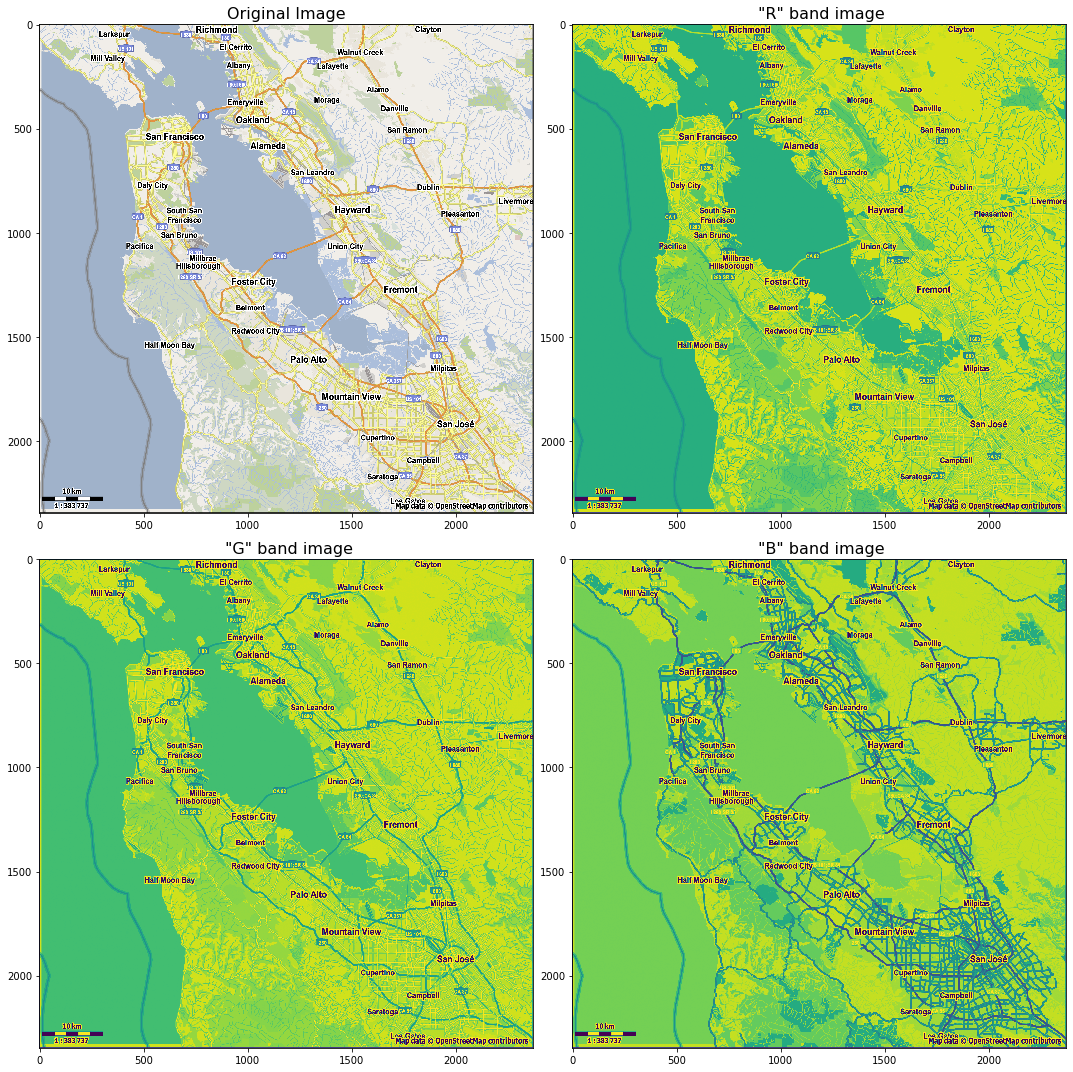

In [18]:
img = Image.open(img_file)
print(img.mode)
print(img.size)


in_data = np.asarray(img, dtype='uint16')

# Split image data into R, G, B channels
r, g, b, a = in_data.T

img_red_channel = r.T
img_green_channel = g.T
img_blue_channel = b.T
img_a_channel = a.T

# img_red_channel = r
# img_green_channel = g
# img_blue_channel = b

# Scale all 3 matrices before SVD
img_red_channel_scaled = (img_red_channel-img_red_channel.mean())/img_red_channel.std()
img_green_channel_scaled = (img_green_channel-img_green_channel.mean())/img_green_channel.std()
img_blue_channel_scaled = (img_blue_channel-img_blue_channel.mean())/img_blue_channel.std()
# img_a_channel_scaled = (img_a_channel-img_a_channel.mean())/img_a_channel.std()

# img_red_channel, img_green_channel, img_blue_channel = get_image_channels(rgb_img_as_matrix)
# An example decomposition - RGB img - decompose on separated channels
U_red, S_red, V_red = np.linalg.svd(img_red_channel_scaled)  # Get red decomposition
U_green, S_green, V_green = np.linalg.svd(img_green_channel_scaled)  # Get green decomposition
U_blue, S_blue, V_blue = np.linalg.svd(img_blue_channel_scaled)  # Get blue decomposition
# U_a, S_a, V_a = np.linalg.svd(img_a_channel_scaled)  # Get blue decomposition

# # Generate decomposed matrices
# red_decomposed_list = generate_decomposed_matrices(U_red, S_red, V_red)
# green_decomposed_list = generate_decomposed_matrices(U_green, S_green, V_green)
# blue_decomposed_list = generate_decomposed_matrices(U_blue, S_blue, V_blue)
# # Save sample results
# save_sample_rgb_decomposition('rgb_img', red_decomposed_list, green_decomposed_list, blue_decomposed_list, 30)


first_n_decomp = [1, 2, 5, 10, 20, 25, 50, 75, 100, 200, 500, 750, 1000, 1250, 1500, 1750, 2000]
num_components = 2000
reconst_mat_red = np.matrix(U_red[:, :num_components]) @ np.diag(S_red[:num_components]) @ np.matrix(V_red[:num_components, :])
reconst_mat_green = np.matrix(U_green[:, :num_components]) @ np.diag(S_green[:num_components]) @ np.matrix(V_green[:num_components, :])
reconst_mat_blue = np.matrix(U_blue[:, :num_components]) @ np.diag(S_blue[:num_components]) @ np.matrix(V_blue[:num_components, :])
# reconst_mat_a = np.matrix(U_a[:, :num_components]) @ np.diag(S_a[:num_components]) @ np.matrix(V_a[:num_components, :])

print(reconst_mat_red.shape)
print(reconst_mat_green.shape)
print(reconst_mat_blue.shape)
# print(reconst_mat_a.shape)

# reconst_image_new = np.concatenate(reconst_img_red, reconst_img_green, reconst_img_blue, )
# reconst_image_new.show()
# reconst_image = 
# plt.imshow(reconst_mat_green)
# plt.savefig('reconstructed_image_with_100_SVs.png',dpi=150, figsize=(8,6))


fig, axs = plt.subplots(2, 2,figsize=(15,15))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original Image', size=16)
axs[0, 1].imshow(reconst_mat_red)
axs[0, 1].set_title(' "R" band image', size=16)
axs[1, 0].imshow(reconst_mat_green)
axs[1, 0].set_title(' "G" band image', size=16)
axs[1, 1].imshow(reconst_mat_blue)
axs[1, 1].set_title(' "B" band image', size=16)
plt.tight_layout()
# plt.savefig('Original_image_and_G_band_image_for_SVD.jpg',dpi=150)





# Transform channel data
# r, g, b = (g + b) // 2, (r + b) // 2, (r + g) // 2

# Merge channels
out_data = np.stack((reconst_mat_red, reconst_mat_green, reconst_mat_blue), axis=2).astype('uint8')

out_img = Image.fromarray(out_data)
plt.imshow(out_img)
